In [1]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
with open("all_movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)

In [71]:
df = pd.DataFrame(all_movies)
df['production_budget'] = df['production_budget']*1000000
df['budget'] = 0
df['budget'][df['imdb_budget'] != 0]  = df['imdb_budget']
df['budget'][df['imdb_budget'] == 0]  = df['production_budget']
df['month'] = df['release_date'].map(lambda x: x.month)
df['budget'] = df['budget'].where(df['budget']!=0, np.nan)
df = df[df.budget <= 270000000] #Get rid of clear error budgets
df

,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,month
0,Buena Vista,623357910,895237000,Action / Adventure,220000000,2.200000e+08,PG-13,2012-05-04,142,Marvel's The Avengers,1518594910,220000000,5
1,Warner Bros.,448139099,636300000,Action Thriller,250000000,2.500000e+08,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,7
2,Lionsgate,408010692,283237076,Action / Adventure,78000000,7.800000e+07,PG-13,2012-03-23,142,The Hunger Games,691247768,78000000,3
3,Sony / Columbia,304360277,804200736,Action,200000000,2.000000e+08,PG-13,2012-11-09,143,Skyfall,1108561013,200000000,11
4,Warner Bros.,303003568,714000000,Fantasy,180000000,0.000000e+00,PG-13,2012-12-14,166,The Hobbit: An Unexpected Journey,1017003568,180000000,12
5,Lionsgate/Summit,292324737,537360640,Romance,0,1.200000e+08,PG-13,2012-11-16,116,The Twilight Saga: Breaking Dawn Part 2,829685377,120000000,11
6,Sony / Columbia,262030663,495900000,Action / Adventure,230000000,2.300000e+08,PG-13,2012-07-03,136,The Amazing Spider-Man,757930663,230000000,7
7,Buena Vista,237283207,301700000,Animation,185000000,1.850000e+08,PG,2012-06-22,100,Brave,538983207,185000000,6
8,Universal,218815487,330552828,Comedy,50000000,5.000000e+07,R,2012-06-29,106,Ted,549368315,50000000,6
9,Paramount (DreamWorks),216391482,530529792,Animation,145000000,1.450000e+08,PG,2012-06-08,93,Madagascar 3: Europe's Most Wanted,746921274,145000000,6


In [73]:
y, X = dmatrices('domestic_gross ~ budget + rating', data=df, return_type='dataframe')

In [74]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: domestic_gross R-squared: 0.527 
 
 
 Model: OLS Adj. R-squared: 0.524 
 
 
 Method: Least Squares F-statistic: 135.8 
 
 
 Date: Tue, 14 Jul 2015 Prob (F-statistic): 2.75e-115 
 
 
 Time: 13:00:09 Log-Likelihood: -14106. 
 
 
 No. Observations: 737 AIC: 2.823e+04 
 
 
 Df Residuals: 730 BIC: 2.826e+04 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 Intercept -1.926e+07 1.4e+07 -1.373 0.170 -4.68e+07 8.28e+06 
 
 
 rating[T.NC-17] 1.023e+07 5.18e+07 0.197 0.844 -9.15e+07 1.12e+08 
 
 
 rating[T.PG] 3.58e+07 1.49e+07 2.406 0.016 6.59e+06 6.5e+07 
 
 
 rating[T.PG-13] 3.023e+07 1.42e+07 2.126 0.034 2.31e+06 5.81e+07 
 
 
 rating[T.R] 2.583e+07 1.42e+07 1.816 0.070 -2.09e+06 5.38e+07 
 
 
 rating[T.Unrated] 9.63e+06 1.47e+07 0.657 0.511 -1.91e+07 3.84e+07 
 
 
 budget 1.0021 0.041 24.671 0.000 0.922 1.082 
 
 
 
 
 Omnibus: 407.931 Durbin-Watson: 1.094 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 6326.825 
 
 
 Skew: 2.137 Prob(JB): 0.00 
 
 
 Kurtosis: 16.702 Cond. No. 1.74e+09

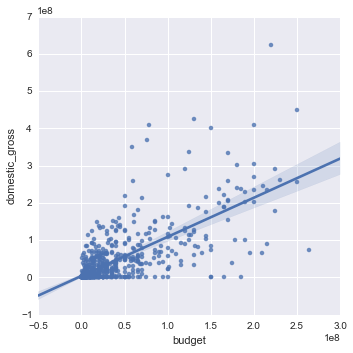

In [82]:
sns.lmplot(x="budget", y="domestic_gross", ci = 95, data=df)

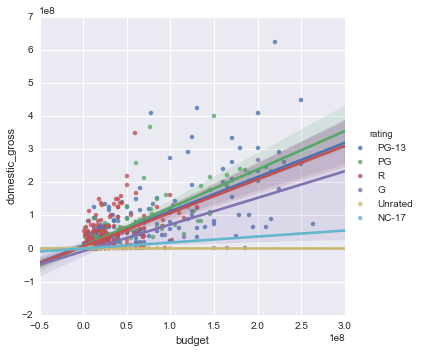

In [83]:
sns.lmplot(x="budget", y="domestic_gross", hue="rating", data=df);

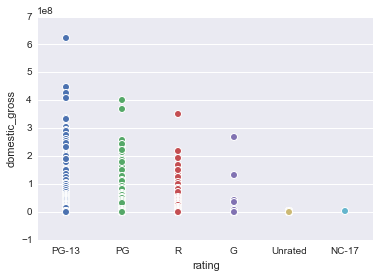

In [77]:
sns.stripplot(x="rating", y="domestic_gross", data=df);

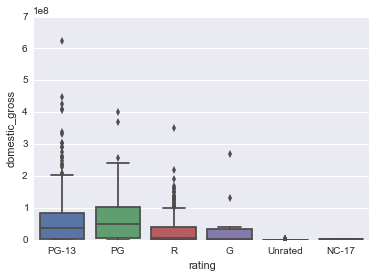

In [78]:
sns.boxplot(x="rating", y="domestic_gross", data=df);

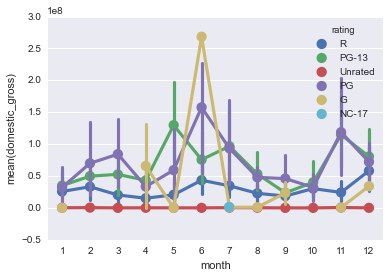

In [79]:
sns.pointplot(x="month", y="domestic_gross", hue = 'rating', data=df.sort('month'));

In [ ]:
roi